# An Adventure in Algorithms: Dipping Your Toes into Machine Learning
## AI vs ML
- AI is the general umbrella for getting technology to perform "human tasks"
- Includes robitics, computer vision, speech recognition, machine learning, etc.
- Look up a decent definition of machine learning
- Machine learning is our focus

## Types of Machine Learning
- Supervised
- Unsupervised
- Reinforcement

## Methods for Machine Learning
- Many, many, many
- Most operate on the same premise - create a "stucture" with parameters, then "learn" the parameters that perform the task
- Examples:
    - Linear Regression
    - Support Vector Machines
    - Decision Trees
    - Neural Networks
    - Many Others
- I will introduce some of these methods as we go.

## A basic example - Linear Regression
- linear regression example
- Discussion as to "line of best fit"
- Discussion about training/testing sets
- short time for them to try and find the "optimal" slope and y-intercept
    - Consider saving all the guesses and plotting 2 plot - the current line only and all the previous guesses
- Talk (in broad terms) about how the optimization is conducted in code.
- Use scikit learn to do linear regression
- Use a multivariable dataset - something linear in form - show the training progress curves

## Introduction to Neural Networks??
- This could go here or somewhere else

## Another type of machine learning
- Classification
- Show webpage with the demonstration
- Talk about feature selection
- Have them run an example - Titanic? Something else?



## A Simple Linear Regression

In [120]:
import matplotlib.pyplot as plt
import random
import numpy as np

from sklearn import datasets, linear_model, neural_network
from sklearn.metrics import mean_squared_error

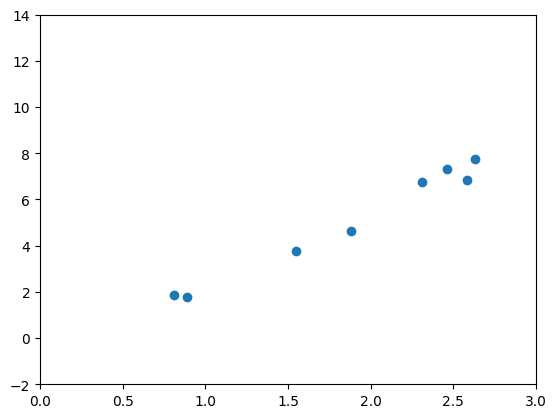

In [121]:
seed = 9485

random.seed(seed)

m_orig = random.uniform(0.5, 3)
b_orig = random.uniform(-2,5)
N = 8
xmin = 0.5
xmax = 3

x = np.array([round(random.uniform(xmin, xmax), 2)for _ in range(N)])
y = np.array([round(m_orig*xi + b_orig + random.normalvariate(mu=0.0, sigma=.35),2) for xi in x])

plt.scatter(x, y)
plt.xlim(0, 3)
plt.ylim(-2, 14)
plt.show()

In [107]:
def plot_new_line(ms, bs, x, y):
    xs = np.array([0,3])

    # 2 Plots, side-by-side
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

    # Add the most recent line
    ax1.plot(xs, ms[-1]*xs+bs[-1], color='red')

    # Add lines for the previous attempts
    for (i,(m, b)) in enumerate(zip(ms, bs)):
        color = 'red' if i == len(ms)-1 else 'gray'
        ax2.plot(xs, m*xs+b, color=color)

    # Draw the scatter plot on top of the lines, prevents the previous attempts from cluttering up the data
    ax1.scatter(x, y, color='blue')
    ax2.scatter(x, y, color='blue')
    plt.xlim(0, 3)
    plt.ylim(-2, 14)
    plt.show()

    return [mean_squared_error(y, m*x+b) for (m,b) in zip(ms, bs)]

ms=[]
bs=[]

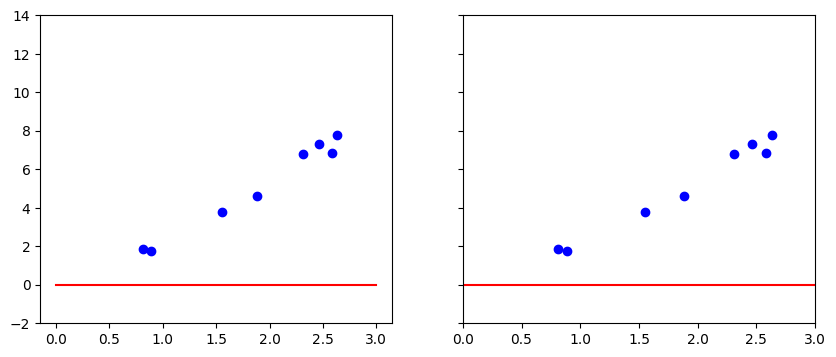

MSEs:

31.068425


In [108]:
m = 0.0
b = 0.0

ms.append(m)
bs.append(b)
mses = plot_new_line(ms, bs, x, y)
print('MSEs:\n')
for m in mses:
    print(f'{m}')

## Let's Do This Automically

MSE: 0.10622630874323205
m = 3.258895415458668 
b = -1.065238715947559


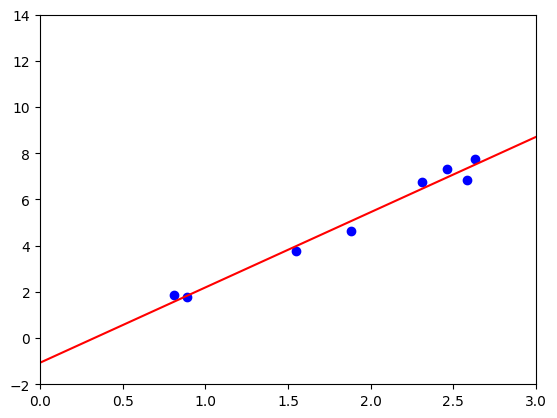

In [109]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.reshape(-1,1), y.reshape(-1,1))

# Plot the data
plt.scatter(x,y, color='blue')

# Plot the line which minimizes MSE
x_toplot = np.array([0,3]).reshape(-1,1)
y_toplot = regr.predict(x_toplot)
plt.plot(x_toplot, y_toplot, color='red')
plt.xlim(0, 3)
plt.ylim(-2, 14)

# Print the MSE and the parameters for the line
print(f'MSE: {mean_squared_error(y, regr.predict(x.reshape(-1,1)))}')
print(f'm = {regr.coef_[0][0]} \nb = {regr.intercept_[0]}')

## A More Practical Example

The following code loads a dataset that includes a "toy" dataset which is taken from a diabetes dataset. We are narrowing to one "feature" here (normalized BMI) and predicting a "quantitative measure of disease progression one year after baseline." The data comes from [this site](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In the following plot, the black dots are the training set, while the red dots are the test set.

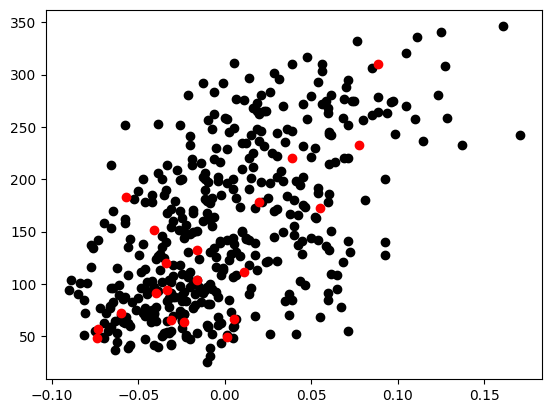

In [110]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.scatter(diabetes_X_test, diabetes_y_test, color="red")
plt.show()

MSE: 2548.07239872597
m = 938.2378612513521 
b = 152.91886182616113


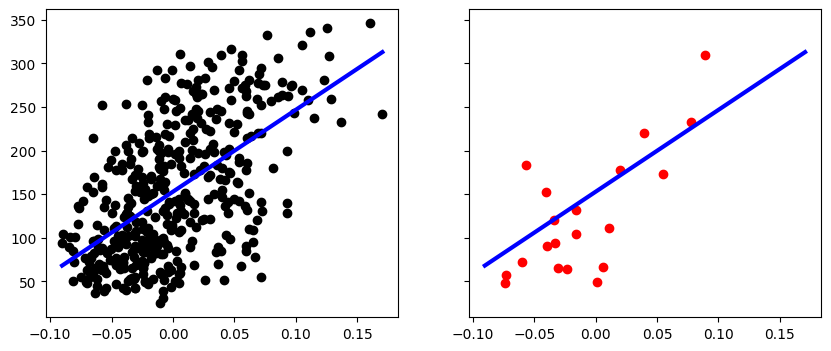

In [117]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print(f'MSE: {mean_squared_error(diabetes_y_test, diabetes_y_pred)}')
print(f'm = {regr.coef_[0]} \nb = {regr.intercept_}')

# For plotting the line of best fit, get the min and max x value so that we can build the line to match all the data
xmin = min(diabetes_X_train.min(), diabetes_X_test.min())
xmax = max(diabetes_X_train.max(), diabetes_X_test.max())
x_plot = np.array([xmin, xmax]).reshape(-1,1)
y_plot = regr.predict(x_plot)

# Plot outputs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4), sharey=True)
ax1.scatter(diabetes_X_train, diabetes_y_train, color="black")
ax2.scatter(diabetes_X_test, diabetes_y_test, color="red")
ax1.plot(x_plot, y_plot, color="blue", linewidth=3)
ax2.plot(x_plot, y_plot, color="blue", linewidth=3)

plt.show()

# Can we do this with a neural network?

Test Mean squared error: 2575.78


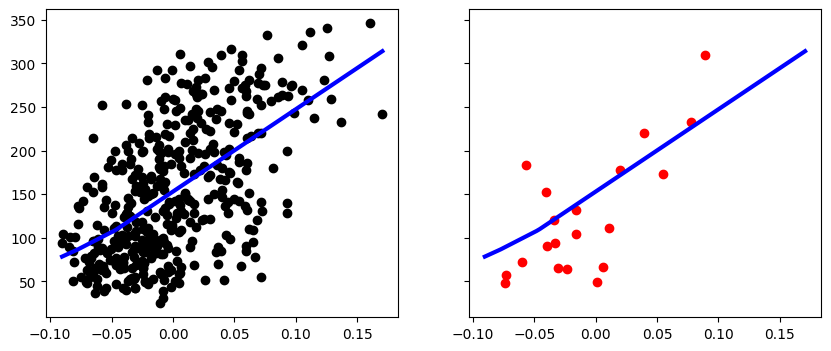

In [146]:
# Hyperparameters
learning_rate = 0.1
hidden_layer_sizes=(15, 3)
max_iter = 20000

# Create linear regression object
regr = neural_network.MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate_init=learning_rate)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The mean squared error
print("Test Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# For plotting the line of best fit, get the min and max x value so that we can build the line to match all the data
xmin = min(diabetes_X_train.min(), diabetes_X_test.min())
xmax = max(diabetes_X_train.max(), diabetes_X_test.max())
x_plot = np.linspace(xmin,xmax,100).reshape(-1,1)
y_plot = regr.predict(x_plot)

# Plot outputs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4), sharey=True)
ax1.scatter(diabetes_X_train, diabetes_y_train, color="black")
ax2.scatter(diabetes_X_test, diabetes_y_test, color="red")
ax1.plot(x_plot, y_plot, color="blue", linewidth=3)
ax2.plot(x_plot, y_plot, color="blue", linewidth=3)

plt.show()